![](activation.jpg)

In [Neural Network Basics: Part 2](https://tonyjustdevs.github.io/blog/posts/2024-02-02-neural_network_basics/), the parameters of a function were found (optimised) to Minimise the Loss Function. The Loss Function chosen was the Mean Absolute Error, it could have been chosen to be the Mean Squared Error. 

But **What is the mathematical function** if the wish to model something more complex like predicting the breed of Cat?

Unfortunately, its unlikely the relationship between the parameters and whether a pixel is part of a Maine Coon 🐈 is a Quadratic, its going to be something more complicated.

Thankfully, there exists the *infinitely flexible function* known as **Rectified Linear Unit (ReLU)**

## 1. Rectified Linear Unit (ReLU)

In [1]:
from ipywidgets import interact
from fastai.basics import *
from functools import partial

### 1.1 Function  
The function does two things:  
1. Calculate the output of a line  
2. If the output is smaller than zero, return zero

In [2]:
def rectified_linear(m,b,x):
    y = m*x+b
    return torch.clip(y,0.)

### 1.2 Create A Custom ReLU Method

In [10]:
def custom_relu_fn(m,b): return partial(rectified_linear,m,b)

### 1.3 Create `y = 1x + 1` with Custom ReLU Method

In [4]:
fn_11 = custom_relu_fn(1,1)
fn_11

functools.partial(<function rectified_linear at 0x00000220331C9D00>, 1, 1)

### 1.4 ReLU `y = 1x+ 1` Plot

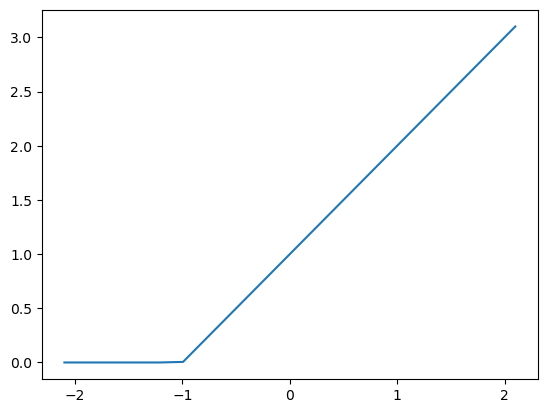

In [5]:
x = torch.linspace(-2.1,2.1,20)
plt.plot(x,fn_11(x))

#### 1.4.1 Interactive ReLU

In [6]:
plt.rc('figure', dpi=90)

@interact(m=1.2, b=1.2)
def plot_relu(m, b):
    min, max = -4.1, 4.1
    x = torch.linspace(min,max, 100)[:,None]
    fn_fixed = partial(rectified_linear, m,b)
    ylim=(-1,4)
    plt.ylim(ylim)
    plt.axvline(0, color='gray', linestyle='dotted', linewidth=2)
    plt.axhline(0, color='gray', linestyle='dotted', linewidth=2)
    plt.plot(x, fn_fixed(x))

interactive(children=(FloatSlider(value=1.2, description='m', max=3.5999999999999996, min=-1.2), FloatSlider(v…

![](relu.jpg)

### 1.5 Double ReLU Function

In [7]:
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1) + rectified_linear(m2,b2) 

#### 1.5.1 Interactive Double ReLU

In [8]:
plt.rc('figure', dpi=90)

def dbl_rectified_linear(m1, b1,m2,b2,x): 
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)
 
@interact(m1=-1.2, b1=-1.2,m2=1.2, b2=1.2)
def plot_dbl_relu(m1,b1,m2,b2):
    min, max = -3.1, 3.1
    x = torch.linspace(min,max, 100)[:,None]
    fn_fixed = partial(dbl_rectified_linear, m1,b1,m2,b2)
    ylim=(-1,4)
    xlim=(-4,4)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.axvline(0, color='gray', linestyle='dotted', linewidth=2)
    plt.axhline(0, color='gray', linestyle='dotted', linewidth=2)
    plt.plot(x, fn_fixed(x))

interactive(children=(FloatSlider(value=-1.2, description='m1', max=1.2, min=-3.5999999999999996), FloatSlider…

![](dbl_relu.jpg)

#### 1.5.1 Triple ReLU for Good Measure!

In [9]:
def trple_rectified_linear(m1, b1, m2, b2, m3, b3, x): 
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x) + rectified_linear(m3,b3,x)
 
@interact(m1=-1.2, b1=-1.2,m2=1.2, b2=1.2, m3=0.5, b3=0.5)
def plot_trple_relu(m1,b1,m2,b2,m3,b3):
# static variables
    min, max = -3.1, 3.1
    x = torch.linspace(min,max, 100)[:,None]
    
# update partial to include extra parameters m3, b3
    triple_relu_fn_y = partial(trple_rectified_linear, m1,b1,m2,b2,m3,b3)

# static variables
    ylim=(-1,4) 
    xlim=(-4,4)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.axvline(0, color='gray', linestyle='dotted', linewidth=2)
    plt.axhline(0, color='gray', linestyle='dotted', linewidth=2)
    plt.plot(x, triple_relu_fn_y(x))

interactive(children=(FloatSlider(value=-1.2, description='m1', max=1.2, min=-3.5999999999999996), FloatSlider…

![](triple_relu.jpg)

## 2. ReLU is An Infinitely Flexible Function

There could be arbitrarily many ReLus added together to form any function!

The previous functions are of a single input `x` i.e. 2-Dimensions.

ReLU's could be added together over **as many dimensions as desired**, i.e. ReLU's over surfaces or ReLU's over 3D, 4D 5D etc.

But adding these ReLU's, this means there are **arbitrary amount of parameters** related to each ReLU, how can these parameters be calculated?

In [Part 2](https://tonyjustdevs.github.io/blog/posts/2024-02-02-neural_network_basics/), a optimisation method called **Gradient Descent** was used to determine Parameters.

That's ***Deep Learning in a nutshell***. Beyond this, Tweaks are to:  
- make it faster  
- require less data  
![](owl_dl.jpg)

## Neural Network Basics Completed.

Go back to a previous post:  
    
[Neural Network Basics: Part 1](https://tonyjustdevs.github.io/blog/posts/2024-01-31-99_neural_network_basics/)  
[Neural Network Basics: Part 2](https://tonyjustdevs.github.io/blog/posts/2024-02-02-neural_network_basics/)   
[Neural Network Basics: Part 3](https://tonyjustdevs.github.io/blog/posts/2024-02-03-neural_network_basics/)  